<a href="https://colab.research.google.com/github/veera-learn/TravelHaven-room-boooking/blob/main/Sales%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

df = pd.read_excel("/content/Retail_Sales.xlsx")

print(df.head())

print(df.shape)
print(df.describe())
print(df.isnull().sum())

   Order_ID Order_Date         Category Sub_Category Product_Name  Sales  \
0      1001 2024-01-05        Furniture       Chairs      Chair A    250   
1      1002 2024-01-08  Office Supplies      Binders     Binder B    100   
2      1003 2024-01-15       Technology       Phones      Phone C   1200   
3      1004 2024-02-01        Furniture       Tables      Table D    450   
4      1005 2024-02-10       Technology  Accessories  Accessory E    300   

   Quantity  Discount  Profit Region Customer_Segment  
0         2      0.10      40   East         Consumer  
1         5      0.20      10   West        Corporate  
2         3      0.15     300  South      Home Office  
3         1      0.05      50  North         Consumer  
4         4      0.10      60   East        Corporate  
(5, 11)
          Order_ID           Order_Date        Sales  Quantity  Discount  \
count     5.000000                    5     5.000000  5.000000  5.000000   
mean   1003.000000  2024-01-20 04:48:00   460.0

In [3]:
category_sales = df.groupby("Category")["Sales"].sum().sort_values(ascending=False)

print(category_sales)

Category
Technology         1500
Furniture           700
Office Supplies     100
Name: Sales, dtype: int64


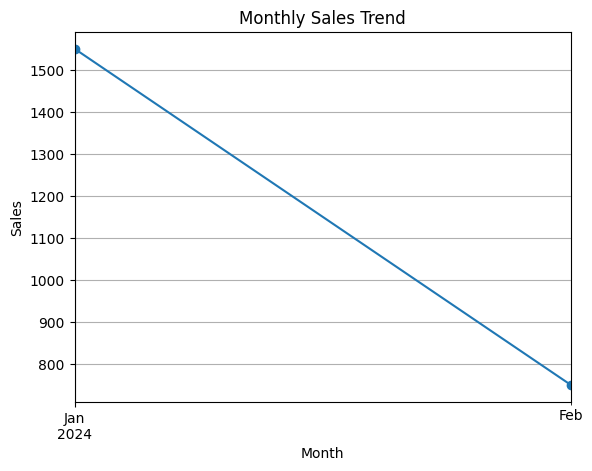

In [4]:
df["YearMonth"] = pd.to_datetime(df["Order_Date"])

df["YearMonth"] = df["Order_Date"].dt.to_period("M")

monthly_sales = df.groupby("YearMonth")["Sales"].sum()


import matplotlib.pyplot as plt
monthly_sales.plot(kind = "line", marker = "o", title = "Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.grid(True)
plt.show()

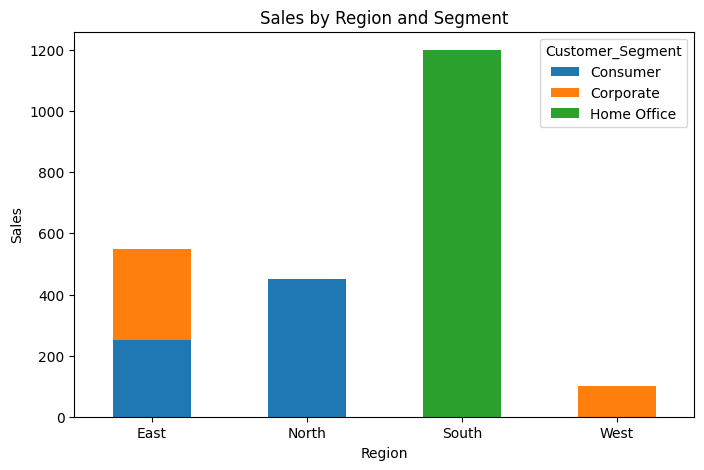

In [8]:
region_segment = df.pivot_table(values = "Sales", index = "Region", columns = "Customer_Segment", aggfunc = "sum")

region_segment.plot(kind = "bar", stacked = True, figsize=(8, 5), title="Sales by Region and Segment")
plt.ylabel("Sales")
plt.xticks(rotation = 0)
plt.show()